#Chapter 10 - Time Series

+ `datetime()`
+ `.timedelta()`
+ `str.strftime('%Y-%m-%d')`, `datetime.strptime(x, '%d/%m/%Y)'` - parse string with known format to datetime
+ `dateutil.parser.parse.parse(str)` - parse string with unknow format
+ `pd.to_datetime(list of strs)` - parse standard formats, handles None as NaT
+ `pd.Series(value), index=DatetimeIndex)` - create time series
+ `ts.truncate(before='2003-01-01')`  - truncate series
+ `pd.date_range('start', periods=, freq=)` - generate index
    + pd.date_range('2001-01-01', periods=30, freq='WOM-3FRI')
+ `dup_ts.groupby(level=0)` - aggregate duplicate index data
+ `pd.date_range(start=, end=, periods=20, freq=, normalize=True)
+ `ts.shift(number, freq=, )` - shift time series
    + calculate percent changes in data: `ts/ts.shift(1)-1`
+ `offset=MonthEnd(); ts.groupby(offset.rollforward).mean()` - to get average by month
    + same as `ts.resample('M', how='mean')`
+  `.tz_localize()` and `.tz_convert()` - localize and convert timezone
+  `pd.period_range('20000101','20000630', freq='M')` - PeriodIndex, could be used as index
+  `period.asfreq('M', how='start')` - freq conversion
    + also can convert time series similarly: `ts.asfreq('', how='')`
+  `datetime/period.to_timestamp()` 
+  `ts.to_period()'
+  `index = pd.PeriodIndex(year=data.year, quarter=data.quarter, freq='Q-DEC')`  - PeriodIndex from array
+  `ts.resample('M', how='mean', kind='period', fill_method='ffill', closed='right', label='right', limit=)`  - resampling
+  `pd.rolling_mean(data, 250, min_periods=)` - rolling mean/std 
+  `pd.rolling_apply(data, span=, min_periods=, func=)`  - apply specific function to rolling periods

In [184]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from datetime import timedelta
from dateutil.parser import parse
import numpy as np
from pandas.tseries.offsets import Hour, Minute, Day, MonthEnd

##Convert to datetime

In [4]:
now = datetime.now()
now

datetime.datetime(2015, 6, 23, 13, 56, 37, 876000)

In [5]:
now.year, now.month, now.day

(2015, 6, 23)

In [7]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8,15)
delta

datetime.timedelta(926, 56700)

In [10]:
delta.days, delta.seconds

926

In [14]:
start =  datetime(2011, 1, 7)
start + timedelta(12), start - 2 * timedelta(12)

(datetime.datetime(2011, 1, 19, 0, 0), datetime.datetime(2010, 12, 14, 0, 0))

In [15]:
datestrs = ['7/6/2011', '8/6/2011']
[datetime.strptime(x, '%d/%m/%Y') for x in datestrs]

[datetime.datetime(2011, 6, 7, 0, 0), datetime.datetime(2011, 6, 8, 0, 0)]

##Basics:

In [22]:
dates = [datetime(2001,1,2), datetime(2001,1,5), datetime(2001,1,7), datetime(2001,1,8),datetime(2001,1,10), datetime(2001,1,12)]
ts = pd.Series(np.random.randn(6), index=dates)
ts

2001-01-02   -0.043065
2001-01-05    0.795079
2001-01-07   -0.260652
2001-01-08    0.112792
2001-01-10    1.122197
2001-01-12   -1.011343
dtype: float64

In [24]:
ts + ts[::2]

2001-01-02   -0.086130
2001-01-05         NaN
2001-01-07   -0.521305
2001-01-08         NaN
2001-01-10    2.244394
2001-01-12         NaN
dtype: float64

Index of time series is `DatetimeIndex`, which are timestamps stored in `datetime64` type.  
Element of `DatetimeIndex` are `Timestamp` objects

###Indexing, slicing time series
+ could use datetime, strings of dates, or Timestamp, will automatically recognize

In [32]:
stamp = ts.index[2]
ts[stamp]

-0.26065248671688612

In [28]:
ts['1/10/2001'], ts['20010110']

(1.1221972398446791, 1.1221972398446791)

In [31]:
longer_ts = pd.Series(np.random.randn(1000),
                  index=pd.date_range('2001-01-01', periods=1000))

In [35]:
longer_ts['2001-12-25':'2001-12-31']

2001-12-25   -0.504424
2001-12-26   -0.541032
2001-12-27    1.302668
2001-12-28    0.872633
2001-12-29   -1.435331
2001-12-30    0.316514
2001-12-31   -0.948176
Freq: D, dtype: float64

In [47]:
longer_ts.truncate(before='2003-05-01')

2003-05-01    0.754168
2003-05-02   -1.712847
2003-05-03    0.510372
2003-05-04    2.047642
2003-05-05   -1.533124
2003-05-06    0.299380
2003-05-07   -0.108829
2003-05-08   -0.620412
2003-05-09    0.820070
2003-05-10    1.321178
2003-05-11   -0.474975
2003-05-12    0.808327
2003-05-13    1.465529
2003-05-14    1.824638
2003-05-15   -0.970271
...
2003-09-13    0.699672
2003-09-14    0.370905
2003-09-15   -2.954452
2003-09-16    0.018892
2003-09-17   -0.569614
2003-09-18   -1.659805
2003-09-19   -1.607561
2003-09-20    0.326318
2003-09-21    1.644668
2003-09-22    0.190087
2003-09-23    2.035348
2003-09-24    1.521530
2003-09-25    0.948924
2003-09-26    1.038703
2003-09-27   -1.363364
Freq: D, Length: 150

In [45]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')
long_df = pd.DataFrame(np.random.randn(100,4), index=dates, columns=['Colorado', 'Texas', 'New York', 'Ohio'])
long_df.ix['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,-1.161427,0.598292,-0.370993,0.498838
2001-05-09,-0.106573,1.036303,1.377030,2.515939
2001-05-16,-0.474813,-0.026353,1.128873,0.938924
2001-05-23,-0.428640,0.446975,0.983607,0.335281
2001-05-30,0.406225,0.115490,1.175637,0.619559


###Duplicate indices
+ check by `ts.index.is_unique`
+ `groupby('level=0')`

In [53]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000', '1/2/2000', '1/2/2000'])
dup_tx = pd.Series(range(5), index=dates)

In [54]:
dup_tx

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-02    4
dtype: int64

In [58]:
dup_tx.index.is_unique

False

In [61]:
grouped = dup_tx.groupby(level=0) # aggregate data for non-unique timestamps
grouped.count()

2000-01-01    1
2000-01-02    4
dtype: int64

##Range, freq, shifting
+ `ts.resample(freq='', how=)`

In [63]:
ts, ts.resample('D')

(2001-01-02   -0.043065
 2001-01-05    0.795079
 2001-01-07   -0.260652
 2001-01-08    0.112792
 2001-01-10    1.122197
 2001-01-12   -1.011343
 dtype: float64, 2001-01-02   -0.043065
 2001-01-03         NaN
 2001-01-04         NaN
 2001-01-05    0.795079
 2001-01-06         NaN
 2001-01-07   -0.260652
 2001-01-08    0.112792
 2001-01-09         NaN
 2001-01-10    1.122197
 2001-01-11         NaN
 2001-01-12   -1.011343
 Freq: D, dtype: float64)

###generate date ranges

In [64]:
# generate time stamps
pd.date_range(start='20120104', periods=20)

<class 'pandas.tseries.index.DatetimeIndex'>
[2012-01-04, ..., 2012-01-23]
Length: 20, Freq: D, Timezone: None

In [66]:
# last business day of each month
pd.date_range('20120104', '20121231', freq='BM')

<class 'pandas.tseries.index.DatetimeIndex'>
[2012-01-31, ..., 2012-12-31]
Length: 12, Freq: BM, Timezone: None

###Frequencies and date offsets
+ see page 300 for a full list of frenquencies

In [70]:
hour = Hour(4)
hour

<4 * Hours>

In [72]:
Hour(5) + Minute(30)

<330 * Minutes>

In [71]:
pd.date_range('2001-01-01', periods=30, freq='4H')

<class 'pandas.tseries.index.DatetimeIndex'>
[2001-01-01 00:00:00, ..., 2001-01-05 20:00:00]
Length: 30, Freq: 4H, Timezone: None

In [73]:
pd.date_range('2001-01-01', periods=30, freq='1h30min')

<class 'pandas.tseries.index.DatetimeIndex'>
[2001-01-01 00:00:00, ..., 2001-01-02 19:30:00]
Length: 30, Freq: 90T, Timezone: None

In [74]:
# third Friday of each month
pd.date_range('2001-01-01', periods=30, freq='WOM-3FRI')

<class 'pandas.tseries.index.DatetimeIndex'>
[2001-01-19, ..., 2003-06-20]
Length: 30, Freq: WOM-3FRI, Timezone: None

###Shifting/lagging data

In [75]:
ts

2001-01-02   -0.043065
2001-01-05    0.795079
2001-01-07   -0.260652
2001-01-08    0.112792
2001-01-10    1.122197
2001-01-12   -1.011343
dtype: float64

In [76]:
ts.shift(1)

2001-01-02         NaN
2001-01-05   -0.043065
2001-01-07    0.795079
2001-01-08   -0.260652
2001-01-10    0.112792
2001-01-12    1.122197
dtype: float64

In [77]:
ts.shift(-2)

2001-01-02   -0.260652
2001-01-05    0.112792
2001-01-07    1.122197
2001-01-08   -1.011343
2001-01-10         NaN
2001-01-12         NaN
dtype: float64

In [81]:
now = datetime.now()
now + 3*Day()

Timestamp('2015-06-26 15:39:59.934000')

In [82]:
now + MonthEnd() # roll forward

Timestamp('2015-06-30 15:39:59.934000')

In [83]:
now + MonthEnd(2)

Timestamp('2015-07-31 15:39:59.934000')

In [87]:
offset = MonthEnd()
offset.rollforward(now), offset.rollback(now)

(Timestamp('2015-06-30 15:39:59.934000'),
 Timestamp('2015-05-31 15:39:59.934000'))

In [90]:
# example of getting montly average
ts = pd.Series(np.random.randn(20), index=pd.date_range('20000115', periods=20, freq='4d'))
ts.groupby(offset.rollforward).mean()

2000-01-31    0.103575
2000-02-29    0.237210
2000-03-31    0.314219
dtype: float64

In [91]:
ts.resample('M', how='mean')

2000-01-31    0.103575
2000-02-29    0.237210
2000-03-31    0.314219
Freq: M, dtype: float64

##Time zone 
+ localize, convert
+ if data of two different tz are combined, will be formated into UTC

In [94]:
# naive timezone if not defined
rng = pd.date_range('2012-3-9 9:30', periods=6, freq='D') 
ts = pd.Series(np.random.randn(6), index=rng)
print(ts.index.tz) # print time zone

None


In [95]:
# specify tz
pd.date_range('2012-3-9 9:30', periods=6, freq='D', tz='UTC')

<class 'pandas.tseries.index.DatetimeIndex'>
[2012-03-09 09:30:00+00:00, ..., 2012-03-14 09:30:00+00:00]
Length: 6, Freq: D, Timezone: UTC

In [98]:
# localize naive to UTC
ts_utc = ts.tz_localize('UTC')
print(ts_utc.index.tz)

UTC


In [99]:
# convert one tz to another
ts_utc.tz_convert('US/Eastern')

2012-03-09 04:30:00-05:00    0.331449
2012-03-10 04:30:00-05:00    1.952465
2012-03-11 05:30:00-04:00    0.611062
2012-03-12 05:30:00-04:00   -0.651619
2012-03-13 05:30:00-04:00    0.449961
2012-03-14 05:30:00-04:00    1.004122
Freq: D, dtype: float64

In [101]:
ts_eastern = ts.tz_localize('US/Eastern')
ts_eastern

2012-03-09 09:30:00-05:00    0.331449
2012-03-10 09:30:00-05:00    1.952465
2012-03-11 09:30:00-04:00    0.611062
2012-03-12 09:30:00-04:00   -0.651619
2012-03-13 09:30:00-04:00    0.449961
2012-03-14 09:30:00-04:00    1.004122
Freq: D, dtype: float64

In [102]:
ts_eastern.tz_convert('UTC')

2012-03-09 14:30:00+00:00    0.331449
2012-03-10 14:30:00+00:00    1.952465
2012-03-11 13:30:00+00:00    0.611062
2012-03-12 13:30:00+00:00   -0.651619
2012-03-13 13:30:00+00:00    0.449961
2012-03-14 13:30:00+00:00    1.004122
Freq: D, dtype: float64

In [103]:
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 15:30:00+01:00    0.331449
2012-03-10 15:30:00+01:00    1.952465
2012-03-11 14:30:00+01:00    0.611062
2012-03-12 14:30:00+01:00   -0.651619
2012-03-13 14:30:00+01:00    0.449961
2012-03-14 14:30:00+01:00    1.004122
Freq: D, dtype: float64

In [108]:
rng = pd.date_range('20120307 9:30', periods=10, freq='B')
ts = pd.Series(np.random.randn(10), index=rng)
ts

2012-03-07 09:30:00   -0.038628
2012-03-08 09:30:00   -0.237041
2012-03-09 09:30:00   -0.934501
2012-03-12 09:30:00   -0.835057
2012-03-13 09:30:00    0.227882
2012-03-14 09:30:00   -0.547579
2012-03-15 09:30:00   -0.740655
2012-03-16 09:30:00   -1.044063
2012-03-19 09:30:00   -0.318054
2012-03-20 09:30:00   -0.496142
Freq: B, dtype: float64

In [111]:
ts1 = ts[:7].tz_localize('Europe/London')
ts1

2012-03-07 09:30:00+00:00   -0.038628
2012-03-08 09:30:00+00:00   -0.237041
2012-03-09 09:30:00+00:00   -0.934501
2012-03-12 09:30:00+00:00   -0.835057
2012-03-13 09:30:00+00:00    0.227882
2012-03-14 09:30:00+00:00   -0.547579
2012-03-15 09:30:00+00:00   -0.740655
Freq: B, dtype: float64

In [115]:
ts2 = ts1[:2].tz_convert('Europe/Moscow')
result = ts1+ts2
result.index

<class 'pandas.tseries.index.DatetimeIndex'>
[2012-03-07 09:30:00+00:00, ..., 2012-03-15 09:30:00+00:00]
Length: 7, Freq: B, Timezone: UTC

##Periods

In [117]:
p = pd.Period(2007, freq='A-DEC')
p # annual last calendar date, starting from year 2007

Period('2007', 'A-DEC')

In [118]:
p+5

Period('2012', 'A-DEC')

In [119]:
pd.Period(2014, freq='A-DEC') - p

7L

In [122]:
rng = pd.period_range('20000101','20000630', freq='M')
rng # PeriodIndex

<class 'pandas.tseries.period.PeriodIndex'>
[2000-01, ..., 2000-06]
Length: 6, Freq: M

In [124]:
values = ['2001Q3', '2002Q2', '2003Q1']
index = pd.PeriodIndex(values, freq='Q-DEC')
index

<class 'pandas.tseries.period.PeriodIndex'>
[2001Q3, ..., 2003Q1]
Length: 3, Freq: Q-DEC

###Frequency convertion
+ if converting to low frequency, will be the subperiod
+ time series could be converted as well

In [128]:
p

Period('2007', 'A-DEC')

In [127]:
p.asfreq('M', how='start'), p.asfreq('M', how='end')

(Period('2007-01', 'M'), Period('2007-12', 'M'))

###Quarterly 

In [130]:
p = pd.Period('2012Q4', freq='Q-JAN')
p

Period('2012Q4', 'Q-JAN')

In [132]:
# convert to other frequencies
p.asfreq('D', 'start'), p.asfreq('D', 'end')

(Period('2011-11-01', 'D'), Period('2012-01-31', 'D'))

In [138]:
# timestamp on 4pm on 2nd to last business day of the month
p4pm = (p.asfreq('B', how='end')-1).asfreq('T', how='start') + 16*60
p4pm

Period('2012-01-30 16:00', 'T')

In [139]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

###Conversion between timestamps and periods

In [143]:
rng = pd.date_range('20000101', periods=3, freq='M')
ts = pd.Series(np.random.randn(3), index=rng)
pts = ts.to_period()
ts, pts

(2000-01-31    1.502825
 2000-02-29   -1.199027
 2000-03-31    0.151552
 Freq: M, dtype: float64, 2000-01    1.502825
 2000-02   -1.199027
 2000-03    0.151552
 Freq: M, dtype: float64)

In [144]:
pts.to_timestamp(how='end')

2000-01-31    1.502825
2000-02-29   -1.199027
2000-03-31    0.151552
Freq: M, dtype: float64

###PeriodIndex from arrays

In [ ]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter, freq='Q-DEC')

##Resampling and frequency conversion

In [148]:
rng = pd.date_range('20000101', periods=100, freq='D')
ts = pd.Series(np.random.randn(100), index=rng)
ts.resample('M', how='mean') # monthly average

2000-01-31    0.159638
2000-02-29    0.103422
2000-03-31    0.085059
2000-04-30   -0.249833
Freq: M, dtype: float64

In [149]:
ts.resample('M', how='mean', kind='period')

2000-01    0.159638
2000-02    0.103422
2000-03    0.085059
2000-04   -0.249833
Freq: M, dtype: float64

###Down sampling
+ aggregate to lower frequency, half-open interval, specify which side is closed
+ could also be done by `groupby`

In [152]:
rng = pd.date_range('20000101', periods=12, freq='T')
ts = pd.Series(range(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int64

In [158]:
ts.resample('5min', how='sum', closed='right', label='right')

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int64

In [157]:
ts.resample('5min', how='sum', loffset='-1s')

1999-12-31 23:59:59    10
2000-01-01 00:04:59    35
2000-01-01 00:09:59    21
Freq: 5T, dtype: int64

In [159]:
ts.resample('5min', how='ohlc')

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


In [161]:
rng = pd.date_range('20000101', periods=100, freq='D')
ts = pd.Series(np.arange(100), index=rng)
ts.groupby(lambda x: x.month).mean()

1    15
2    45
3    75
4    95
dtype: int32

In [162]:
ts.resample('M', how='mean')

2000-01-31    15
2000-02-29    45
2000-03-31    75
2000-04-30    95
Freq: M, dtype: int32

###Upsampling
+ fill_method: how to fill na's
+ even for non-overlapping periods

###Resampling with periods
+ downsampling: target freq must be subperiod of source
+ upsampling: target freq ~ superperiod of source

In [167]:
frame = pd.DataFrame(np.random.randn(24,4),
                 index=pd.period_range('2000-1', '2001-12', freq='M'),
                  columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame[:5]

,Colorado,Texas,New York,Ohio
2000-01,-0.339057,-0.431250,-0.875088,1.547620
2000-02,0.276637,-0.038933,-1.116449,-0.604732
2000-03,-3.193396,0.583603,-2.339464,0.005563
2000-04,0.117612,0.271828,0.732419,1.299113
2000-05,2.405365,-1.442928,-1.606103,0.075033


In [169]:
annual_frame = frame.resample('A-DEC', how='mean')
annual_frame

,Colorado,Texas,New York,Ohio
2000,0.244153,-0.328285,-0.438999,0.574157
2001,-0.271196,-0.075650,-0.066573,-0.329574


In [170]:
annual_frame.resample('Q-DEC', fill_method='ffill')

,Colorado,Texas,New York,Ohio
2000Q1,0.244153,-0.328285,-0.438999,0.574157
2000Q2,0.244153,-0.328285,-0.438999,0.574157
2000Q3,0.244153,-0.328285,-0.438999,0.574157
2000Q4,0.244153,-0.328285,-0.438999,0.574157
2001Q1,-0.271196,-0.075650,-0.066573,-0.329574
2001Q2,-0.271196,-0.075650,-0.066573,-0.329574
2001Q3,-0.271196,-0.075650,-0.066573,-0.329574
2001Q4,-0.271196,-0.075650,-0.066573,-0.329574


In [173]:
annual_frame.resample('Q-DEC', fill_method='ffill', convention='end')

,Colorado,Texas,New York,Ohio
2000Q4,0.244153,-0.328285,-0.438999,0.574157
2001Q1,0.244153,-0.328285,-0.438999,0.574157
2001Q2,0.244153,-0.328285,-0.438999,0.574157
2001Q3,0.244153,-0.328285,-0.438999,0.574157
2001Q4,-0.271196,-0.075650,-0.066573,-0.329574


##Time series plotting

In [178]:
close_px_all = pd.read_csv("C:\Users\YDuan\GitHub Repos\Python-for-Data-Analysis\Data\stock_px.csv",
                          parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL', 'MSFT','XOM']]
close_px = close_px.resample('B', fill_method='ffill')

In [181]:
close_px.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2292 entries, 2003-01-02 00:00:00 to 2011-10-14 00:00:00
Freq: B
Data columns (total 3 columns):
AAPL    2292 non-null float64
MSFT    2292 non-null float64
XOM     2292 non-null float64
dtypes: float64(3)
memory usage: 71.6 KB


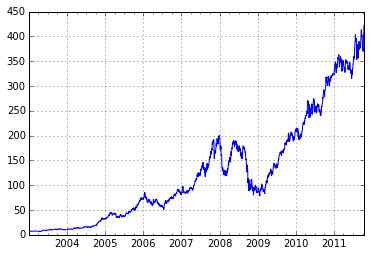

In [185]:
close_px['AAPL'].plot()

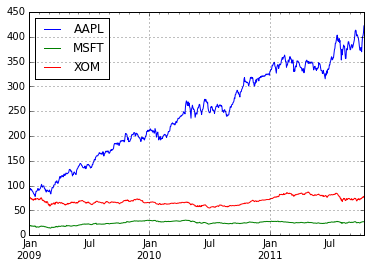

In [191]:
close_px.ix['2009':'2011'].plot()

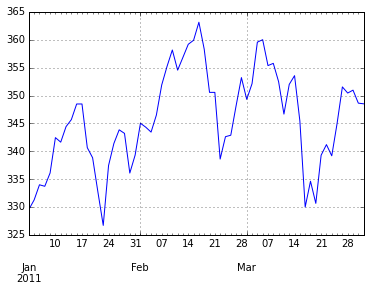

In [192]:
close_px['AAPL'].ix['01-2011':'03-2011'].plot()

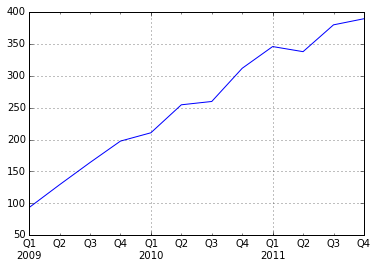

In [197]:
aapl_q = close_px['AAPL'].resample('Q-DEC', fill_method='ffill')
aapl_q.ix['2009':].plot()

##Window function
+ rolling average

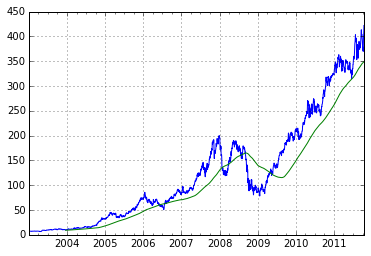

In [198]:
close_px.AAPL.plot()
pd.rolling_mean(close_px.AAPL, 250).plot()

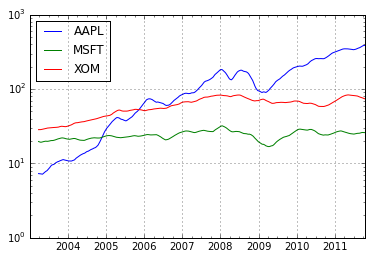

In [199]:
pd.rolling_mean(close_px, 60).plot(logy=True)

###Exponentially weighted functions

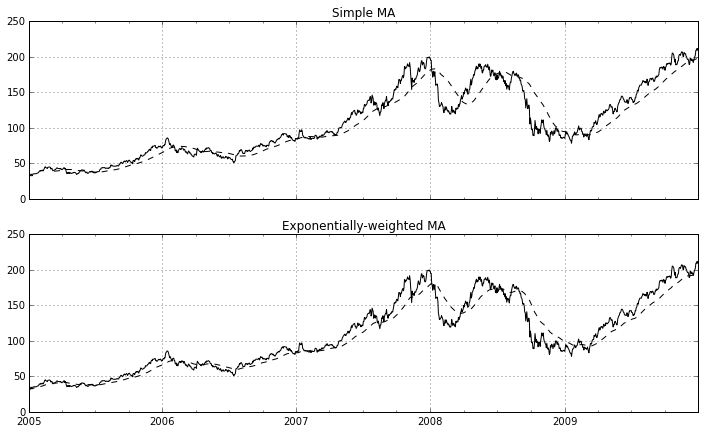

In [203]:
fig, axes = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(12,7))
aapl_px = close_px.AAPL.ix['2005':'2009']
ma60 = pd.rolling_mean(aapl_px, 60, min_periods=50)
ewma60 = pd.ewma(aapl_px, span=60)

aapl_px.plot(style='k-', ax=axes[0])
ma60.plot(style='k--', ax=axes[0])
aapl_px.plot(style='k-', ax=axes[1])
ewma60.plot(style='k--', ax=axes[1])
axes[0].set_title('Simple MA')
axes[1].set_title('Exponentially-weighted MA')

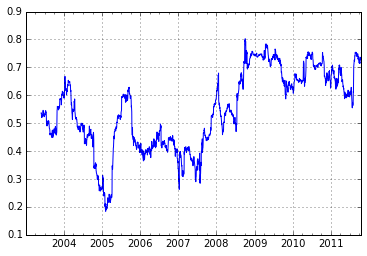

In [211]:
# rolling correlation
spx_px = close_px_all['SPX']
spx_rets = spx_px/spx_px.shift(1) - 1
returns = close_px.pct_change()
corr = pd.rolling_corr(returns.AAPL, spx_rets, 125, min_periods=100)
corr.plot()

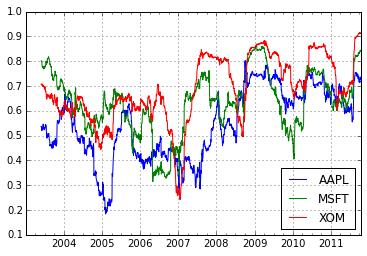

In [212]:
corr = pd.rolling_corr(returns, spx_rets, 125, min_periods=100)
corr.plot()

###rollong_apply

In [213]:
from scipy.stats import percentileofscore

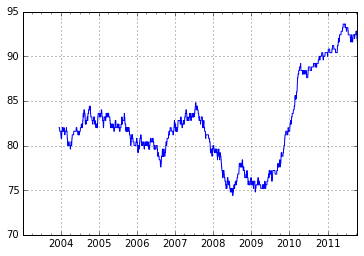

In [217]:
score_at_2percent = lambda x: percentileofscore(x, 0.02)
results = pd.rolling_apply(returns.AAPL, 250, score_at_2percent)
results.plot()